In [ ]:
!pip install transformers
!pip install sacremoses

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 54.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.8/236.8 kB 23.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 97.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 68.0 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 880.6/880.6 kB 15.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for sacremoses: filename=sacremoses-0.0.53-py3-none-any.whl size=895241 sha256=2a773935d2c425bd6a43dacd3e30a3c6a04a81ae0a697c9d2800f0e65954e8c9
  Stored in directory: /root/.cache/pip/wheels/00/24/97/a2ea5324f36bc626e1ea0267f33db6aa80d157ee977e9e42fb
Successfully built sacremoses


In [ ]:
from google.colab import files
import pandas as pd
import numpy as np
import random
import os
from tqdm import tqdm
import seaborn as sns
from sklearn.model_selection import cross_val_score, train_test_split
import joblib
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
import matplotlib.pyplot as plt
from transformers import HerbertTokenizer, RobertaModel, AutoTokenizer, BertModel

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data.dataset import random_split
from torch.utils.data import TensorDataset, DataLoader
import torchvision.transforms as transforms
import torchvision
from sklearn.utils.class_weight import compute_class_weight

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
import lightgbm as lgb

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [ ]:
class MLPClassifier(nn.Module):
    def __init__(self):
      super().__init__()
      self.fc1 = nn.Linear(768, 768*2)
      self.fc2 = nn.Linear(768*2, 768*4)
      self.out = nn.Linear(768*4, 4)
      self.dropout = nn.Dropout(0.2)

    def forward(self, x):
      x = x.view(x.size(0))
      x = F.relu(self.fc1(x))
      x = F.relu(self.fc2(x))
      x = self.dropout(x)
      x = self.out(x)
      return x

In [ ]:
model_NN = MLPClassifier()

In [ ]:
from torchsummary import summary
summary(model_NN, (768,1))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                 [-1, 1536]       1,181,184
            Linear-2                 [-1, 3072]       4,721,664
           Dropout-3                 [-1, 3072]               0
            Linear-4                    [-1, 8]          24,584
Total params: 5,927,432
Trainable params: 5,927,432
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.06
Params size (MB): 22.61
Estimated Total Size (MB): 22.67
----------------------------------------------------------------


In [ ]:
def common_compute(model, batch):
    x, y = batch
    logits = model(x)
    loss = F.cross_entropy(logits, y)
    return logits, loss, y

def train_batch(model, optimizer, batch):
    logits, loss, y = common_compute(model, batch)
    _, predicted = torch.max(logits.data, -1)
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()
    return loss, (predicted == y).sum().item()

def validate_batch(model, batch):
    logits, loss, y = common_compute(model, batch)
    _, predicted = torch.max(logits.data, -1)
    return loss, (predicted == y).sum().item()

def test_batch(model, batch):
    logits, loss, y = common_compute(model, batch)
    _, predicted = torch.max(logits.data, -1)
    return np.array(y).size, (predicted == y).sum().item(), loss, predicted, y

In [ ]:
torch.save(model.state_dict(), 'weights.pth')
loaded_net = MLPClassifier()
loaded_net.load_state_dict(torch.load('weights.pth'))
torch.save(model, 'model.pth')
new_net = torch.load('model.pth')

In [ ]:
df = df_orginal
model = herbert_klej
fraction = 0.1
alpha = 0.2
n_epochs = 20
scheme = 11
test_size = 20
val_size = 10

In [ ]:
os.mkdir("figs")

In [ ]:
x = test[0][0]

In [ ]:
x2 = x.view(x.size(0), -1)

In [ ]:
x2.shape

torch.Size([768, 1])

In [ ]:
def get_confusion_matrix(model, X_test, y_test, model_name, data_type, classes):

  cls =[]
  for k in classes.keys():
    cls.append(k)

  y_pred = model.predict(X_test)
  pred_labels=[]
  for idx in range(len(y_pred)):
    pred_label = np.argmax(y_pred[idx])
    pred_labels.append(pred_label)

  true_labels = y_test
  score = accuracy_score(true_labels, pred_labels)
  cm = confusion_matrix(true_labels, pred_labels, normalize='true')

  #disp = ConfusionMatrixDisplay(confusion_matrix=cm)
  #disp.plot()
  #disp.ax_.set_title("Model: {} | Data type: {} |  Acc: {}".format(model_name, data_type, score))

  #if classes is not None:
      #tick_marks = np.arange(len(cls))
      #plt.xticks(tick_marks, cls, rotation=45)
      #plt.yticks(tick_marks, cls, rotation=50)

  #plt.gcf().set_size_inches(10, 10)
  #plt.savefig('/content/figs/{}_{}.png'.format(model_name, data_type), dpi=200)
  #files.download('/content/figs/{}_{}.png'.format(model_name, data_type))

  return score, cm

In [ ]:
def draw_learning_curve(history, data_type, key='accuracy'):

  fig, ax = plt.subplots(1, 2, figsize=(12,6))
  ax[0].plot(history.history[key])
  ax[0].plot(history.history['val_'+ key] )
  ax[0].set_ylabel(key.title())
  ax[0].set_xlabel('Epoch')
  ax[0].legend(['train', 'val'])

  ax[1].plot(history.history['loss'])
  ax[1].plot(history.history['val_loss'] )
 # ax[1].set_ylim([0,1])
  ax[1].set_ylabel('loss'.title())
  ax[1].set_xlabel('Epoch')
  ax[1].legend(['train', 'val'])
  fig.suptitle('Learning curve | Data type: {}'.format(data_type))
  plt.show()
  #fig.savefig('/content/figs/learning_curve_{}.png'.format(data_type))
  #files.download('/content/figs/learning_curve_{}.png'.format(data_type))


In [ ]:
def get_data_set(labels, df):
  idxs = []
  for label in labels:
    idxs_for_label, = np.where(df['Label'] == label)
    for idx in idxs_for_label:
      idxs.append(idx)

  new_df = df.iloc[idxs]
  new_df = new_df.sample(frac = 1).reset_index(drop=True)
  return new_df

In [ ]:
def print_classes(df):
  authors = {}
  y = df['Label']
  if len(df['Label'].unique()) < 8:
    y = df ['Label'].factorize()[0]
  num_classes = len(df['Label'].unique())
  for label in range(0, num_classes):
    i, = np.where(y == label)
    authors['{}'.format(df['Author-short'][i[0]])] = label

  return authors

In [ ]:
def make_embedding(df, model):

  X_stack = []
  model_name, tokenizer, model = model
  embedded = {}
  tokens = {}
  num_idxs = df.shape[0]
  for idx in tqdm(range(0,num_idxs)):
    single_poem_input = df['Text'][idx]
    inputs = tokenizer.batch_encode_plus([single_poem_input], max_length = 512, padding="longest", add_special_tokens=True, return_tensors="pt",)
    single_poem_output = model(**inputs)
    X_single_poem = single_poem_output[0][:,0,:].detach().numpy()
    X_stack.append(X_single_poem[0])

    embedded[idx] = X_single_poem[0], df['Label'][idx]

  df_embedded = pd.DataFrame.from_dict(embedded,  orient='index', columns=['embedding', 'label'])

  return df_embedded

In [ ]:
def normalize_data(X):

  X_normalized = np.zeros((X.shape[0],X.shape[1]))

  for idx in range(0,X.shape[0]):
    X_normalized[idx,:] = (X[idx,:] - np.mean(X[idx,:]))/ np.std(X[idx,:])

  return X_normalized

In [ ]:
def get_X_y(df, normalization=True):

  X = np.stack(df['embedding'])
  y = df['Label']
  if(normalization==True):
    X = normalize_data(X)

  #jeśli jest mniej niż 8 klas:
  if len(df['Label'].unique()) < 8:
    y = df ['Label'].factorize()[0]

  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
  X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2)

  print(X.shape)

  return X, y, X_train, X_val, X_test, y_train, y_val, y_test

In [ ]:
def get_X_y_train(df, normalization=True):

  X = np.stack(df['embedding'])
  y = df['Label']
  if(normalization==True):
    X = normalize_data(X)

  #jeśli jest mniej niż 8 klas:
  if len(df['Label'].unique()) < 8:
    y = df ['Label'].factorize()[0]

  X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)


  print(X.shape)

  return X, y, X_train, X_val, y_train, y_val

In [ ]:
def get_X_y_test(df, normalization=True):
  X = np.stack(df['embedding'])
  y = df['Label']
  if(normalization == True):
    X = normalize_data(X)

  #jeśli jest mniej niż 8 klas:
  if len(df['Label'].unique()) < 8:
    y = df ['Label'].factorize()[0]

  return X, y

In [ ]:
import string

def remove_punctuation(text):
    no_punct=[words for words in text if words not in string.punctuation]
    words_wo_punct=''.join(no_punct)
    return words_wo_punct

In [ ]:
def swap_words(df):

  dict_new_text = {}

  for idx in tqdm(range(0,len(df))):
    text_split = df['Text'][idx].split()
    to_swap_list = []
    #n_pairs = int((len(text_split) * fraction)/2)
   # if(n_pairs==0):
    n_pairs = 1

    for i in range(0,n_pairs):
      idx_to_swap_1 = random.randrange(0, len(text_split))
      idx_to_swap_2 = random.randrange(0, len(text_split))
      if(idx_to_swap_1 != idx_to_swap_2):
        word_to_swap_1 = text_split[idx_to_swap_1]
        word_to_swap_2 = text_split[idx_to_swap_2]
        text_split[idx_to_swap_1] = word_to_swap_2
        text_split[idx_to_swap_2] = word_to_swap_1

    new_text = ' '.join(text_split)

    dict_new_text[idx] = new_text, df['Label'][idx], df['Author-short'][idx]

  df_swap_words = pd.DataFrame.from_dict(dict_new_text, orient='index', columns=['Text', 'Label', 'Author-short'])
  return df_swap_words

# dzielenie każdego wiersza na fragmenty o długości 60 słów
def cut_with_window(df, window_size, step_size):

  dict_new_text = {}

  for idx in tqdm(range(0,len(df))):
    text_split = df['Text'][idx].split()
    x = 0
    y = window_size
    i = 0
    while x < len(text_split):
      #y = x + window_size
      new_text_arr = text_split[x:y]
      new_text = ' '.join(new_text_arr)

      i = i + 1
      x = x + step_size
      y = min(x + window_size, len(text_split)-1)
      dict_new_text[idx, i] = new_text, df['Label'][idx], df['Author-short'][idx]

  df_cut = pd.DataFrame.from_dict(dict_new_text,  orient='index', columns=['Text', 'Label', 'Author-short'])
  return df_cut

# usuwanie kielku randomowo wybranych słów z orginalnego wiersza
def remove_words(df, fraction):

  dict_new_text = {}

  for idx in tqdm(range(0,len(df))):
    text_split = df['Text'][idx].split()
    f = int(fraction * len(text_split))
    if(f==0):
      f = 1
    to_remove_list = []

    for i in range(0,f):
      to_remove = random.randrange(0, len(text_split))
      to_remove_list.append(to_remove)

    for word_idx in to_remove_list:
      text_split[word_idx] = ' '

    new_text = ' '.join(text_split)

    dict_new_text[idx] = new_text, df['Label'][idx], df['Author-short'][idx]

  df_remove = pd.DataFrame.from_dict(dict_new_text,  orient='index', columns=['Text', 'Label', 'Author-short'])
  return df_remove


# podział wiersza na pół
def cut_in_half(df):

  new_dict_1 = {}
  new_dict_2 = {}

  for idx in tqdm(range(0,len(df))):

    text_split = df['Text'][idx].split()
    x = int(len(text_split)/2)
    new_text_arr_1 = text_split[:x]
    new_text_arr_2 = text_split[x:]
    new_text_1 = " ".join(new_text_arr_1)
    new_text_2 = " ".join(new_text_arr_2)

    new_dict_1[idx] = new_text_1, df['Label'][idx], df['Author-short'][idx]
    new_dict_2[idx] = new_text_2, df['Label'][idx], df['Author-short'][idx]

  df_new_1 = pd.DataFrame.from_dict(new_dict_1,  orient='index', columns=['Text', 'Label', 'Author-short'])
  df_new_2 = pd.DataFrame.from_dict(new_dict_2,  orient='index', columns=['Text', 'Label', 'Author-short'])

  result = pd.concat([df_new_1, df_new_2])
  df_cut = result.reset_index(drop=True)
  df_cut
  return df_cut

#odbicie lustrzane wiersza
def flip(df):
  new_dict = {}

  for idx in tqdm(range(0,len(df))):
    text_split = df['Text'][idx].split()
    text_split.reverse()
    new_text = " ".join(text_split)

    new_dict[idx] = new_text, df['Label'][idx], df['Author-short'][idx]

  df_flip = pd.DataFrame.from_dict(new_dict,  orient='index', columns=['Text', 'Label', 'Author-short'])
  return df_flip

def cut_and_flip(df, part):
  new_dict = {}

  for idx in tqdm(range(0,len(df))):
    text_split = df['Text'][idx].split()
    x = int(len(text_split)/2)
    new_text_arr_1 = text_split[:x]
    new_text_arr_2 = text_split[x:]
    if(part==1):
      new_text_arr_1.reverse()
    if(part==2):
      new_text_arr_2.reverse()
    if(part==3):
      new_text_arr_1.reverse()
      new_text_arr_2.reverse()
    new_text_arr = new_text_arr_1 + new_text_arr_2
    new_text = " ".join(new_text_arr)

    new_dict[idx] = new_text, df['Label'][idx], df['Author-short'][idx]

  df_cut_and_flip = pd.DataFrame.from_dict(new_dict,  orient='index', columns=['Text', 'Label', 'Author-short'])
  return df_cut_and_flip


def remove_half(df):

  new_dict = {}

  for idx in tqdm(range(0,len(df))):

    text_split = df['Text'][idx].split()
    x = round(len(text_split)/2)
    new_text_arr_1 = text_split[:x]
    new_text_arr_2 = text_split[x:]
    new_text_1 = " ".join(new_text_arr_1)
    new_text_2 = " ".join(new_text_arr_2)
    part_to_remove = random.choices((0,1))
    if(part_to_remove==0):
      new_dict[idx] = new_text_1, df['Label'][idx], df['Author-short'][idx]
    else:
      new_dict[idx] = new_text_2, df['Label'][idx], df['Author-short'][idx]

  df_remove_half = pd.DataFrame.from_dict(new_dict,  orient='index', columns=['Text', 'Label', 'Author-short'])

  return df_remove_half

def remove_part(df):

  new_dict_1 = {}
  new_dict_2 = {}

  for idx in tqdm(range(0,len(df))):

    text_split = df['Text'][idx].split()
    x = round(len(text_split)/3)
    new_text_arr_1 = text_split[:x]
    new_text_arr_2 = text_split[x:2*x]
    new_text_arr_3 = text_split[2*x:]
    new_text_1 = " ".join(new_text_arr_1)
    new_text_2 = " ".join(new_text_arr_2)
    new_text_3 = " ".join(new_text_arr_3)
    part_to_remove = random.choices((0,2))
    if(part_to_remove==0):
      new_dict_1[idx] = new_text_2, df['Label'][idx], df['Author-short'][idx]
      new_dict_2[idx] = new_text_3, df['Label'][idx], df['Author-short'][idx]
    if(part_to_remove==1):
      new_dict_1[idx] = new_text_1, df['Label'][idx], df['Author-short'][idx]
      new_dict_2[idx] = new_text_3, df['Label'][idx], df['Author-short'][idx]
    else:
      new_dict_1[idx] = new_text_1, df['Label'][idx], df['Author-short'][idx]
      new_dict_2[idx] = new_text_2, df['Label'][idx], df['Author-short'][idx]



  df_new_1 = pd.DataFrame.from_dict(new_dict_1, orient='index', columns=['Text', 'Label', 'Author-short'])
  df_new_2 = pd.DataFrame.from_dict(new_dict_2, orient='index', columns=['Text', 'Label', 'Author-short'])

  result = pd.concat([df_new_1, df_new_2])
  df_remove_part = result.reset_index(drop=True)
  df_remove_part

  return df_remove_part

In [ ]:
def split_data(df_outer, split_size):
  df = df_outer.copy(deep=True)
  df_train = pd.DataFrame()
  df_test = pd.DataFrame()
  idxs_to_drop = []
  idxs_for_test = []
  n_classes = len(df['Label'].unique())

  if n_classes == 8:
    labels = df["Label"].unique()
    y = df['Label']
  if n_classes < 8:
    y = df['Label'].factorize()[0]
    labels = np.arange(n_classes)

  for n, label in enumerate(labels):
    idxs_for_label, = np.where(y == label)
    idxs_for_test = np.random.choice(idxs_for_label, size = split_size, replace=False)

    for idx in idxs_for_test:
      df_test = df_test.append(df.iloc[idx])
      idxs_to_drop.append(idx)


  for idx in range(0, len(df)):
    if(idx not in idxs_to_drop):
      df_train = df_train.append(df.iloc[idx])

  df_train = df_train.reset_index(drop=True)
  df_test = df_test.reset_index(drop=True)

  if n_classes < 8:
    df_test["Label"] = df_test["Label"].factorize()[0]
    df_train["Label"] = df_train["Label"].factorize()[0]

  return df_train, df_test

In [ ]:
def make_experiment(model, df, test_size, val_size, data_type, scheme, fraction, alpha, n_realizations, normalization):

  normalize = "normalized.0"
  if(normalization==True):
    normalize = "normalized.1"
  model_name = model[0]

  n_classes = len(df['Label'].unique())
  CM = np.zeros((n_classes, n_classes, n_realizations))
  scores = []
  n_epochs = 20

  train_loss_realizations = np.zeros((n_epochs, n_realizations))
  train_acc_realizations = np.zeros((n_epochs, n_realizations))
  val_loss_realizations = np.zeros((n_epochs, n_realizations))
  val_acc_realizations = np.zeros((n_epochs, n_realizations))
  for n in range(0, n_realizations):
    # podział danych na dane testowe oraz treningowe i validacyjne. Dane testowe i validacyjne poddaję embedingowi i tworzę dla nich X, y
    df_train_and_val, df_test = split_data(df, test_size)
    df_train_to_augment, df_val = split_data(df_train_and_val, val_size)

    embed_test = make_embedding(df_test, model)
    df_test = pd.concat([df_test, embed_test['embedding']], axis=1)

    embed_val = make_embedding(df_val, model)
    df_val = pd.concat([df_val, embed_val['embedding']], axis=1)

    #args = [fraction, alpha]
    #df_train = generate_data(model, df_train_to_augment, scheme, args)

    embed_train = make_embedding(df_train_to_augment, model)
    df_train = pd.concat([df_train_to_augment, embed_train['embedding']], axis=1)

    data_test = np.stack(df_test['embedding'])
    label_test = df_test['Label'].values

    data_val = np.stack(df_val['embedding'])
    label_val = df_val['Label'].values

    data_train = np.stack(df_train['embedding'])
    label_train = df_train['Label'].values

    test = TensorDataset(torch.FloatTensor(data_test),torch.LongTensor(label_test))
    val = TensorDataset(torch.FloatTensor(data_val),torch.LongTensor(label_val))
    train = TensorDataset(torch.FloatTensor(data_train),torch.LongTensor(label_train))

    test_loader = DataLoader(test, batch_size=1024,shuffle=True)
    val_loader = DataLoader(val, batch_size=1024,shuffle=True)
    train_loader = DataLoader(train, batch_size=1024,shuffle=True)

    model_NN = MLPClassifier()
    optimizer = torch.optim.Adam(model_NN.parameters(), lr = 1e-4)

    n_epochs = n_epochs
    for epoch in range(n_epochs):
      model_NN.train()
      train_loss = []
      train_acc = []
      bar = tqdm(train, position=0, leave=False, desc='epoch %d'%epoch)
      for batch in bar:
        loss, acc = train_batch(model_NN, optimizer, batch)
        train_loss.append(loss)
        train_acc.append(acc)
        avg_train_loss = torch.stack(train_loss).mean()
        avg_train_loss = avg_train_loss.detach().numpy()
        avg_train_acc = np.stack(train_acc).mean()
      print('train_loss', avg_train_loss.item())
      train_loss_realizations[epoch,n] = avg_train_loss
      train_acc_realizations[epoch,n] = avg_train_acc

      model_NN.eval()
      with torch.no_grad():
        val_loss = []
        val_acc = []
        for batch in val:
          loss, acc = validate_batch(model_NN, batch)
          val_loss.append(loss)
          val_acc.append(acc)
          avg_val_loss = torch.stack(val_loss).mean()
          avg_val_loss = avg_val_loss.detach().numpy()
          avg_val_acc = np.stack(val_acc).mean()
        print('val_loss', avg_val_loss.item())

        val_loss_realizations[epoch,n] = avg_val_loss
        val_acc_realizations[epoch,n] = avg_val_acc

    classes = print_classes(df_test)

    bar = tqdm(test, position=0, leave=False, desc='test')
    test_loss = []
    true_labels = []
    pred_labels = []
    correct = 0
    total = 0
    with torch.no_grad():
        for batch in bar:
            batch_size, batch_correct, loss, predicted, y = test_batch(model_NN, batch)
            total += batch_size
            correct += batch_correct
            test_loss.append(loss)
            true_labels.append(predicted)
            pred_labels.append(y)
        print('Acc: {}'.format(100 * float(correct) / total))
        score = (100 * float(correct) / total)
        cm = confusion_matrix(true_labels, pred_labels, normalize='true')
        CM[:,:,n] = cm
        scores.append(score)

# dane do uśrednionej krzywej uczenia
  val_loss_mean = np.mean(val_loss_realizations, axis=1)
  train_loss_mean = np.mean(train_loss_realizations, axis=1)
  val_acc_mean = np.mean(val_acc_realizations, axis=1)
  train_acc_mean = np.mean(train_acc_realizations, axis=1)

  val_loss_std = np.std(val_loss_realizations, axis=1)
  train_loss_std = np.std(train_loss_realizations, axis=1)
  val_acc_std = np.std(val_acc_realizations, axis=1)
  train_acc_std = np.std(train_acc_realizations, axis=1)

  dict_history = {"val_loss_mean":val_loss_mean,
                  "train_loss_mean":train_loss_mean,
                  "val_acc_mean":val_acc_mean,
                  "train_acc_mean":train_acc_mean,
                  "val_loss_std":val_loss_std,
                  "train_loss_std":train_loss_std,
                  "val_acc_std":val_acc_std,
                  "train_acc_std":train_acc_std}

# uśredniona krzywa uczenia
  fontsize = 16
  epoch_vec = np.arange(0,n_epochs)
  fig, ax = plt.subplots(1,2,figsize = (12, 8))
  clrs = sns.color_palette("flare")
  #ax[1].set_ylim([0,2])
  ax[1].plot(epoch_vec, train_loss_mean, label = "train")
  ax[1].fill_between(epoch_vec, train_loss_mean - train_loss_std, train_loss_mean + train_loss_std, alpha = 0.3, facecolor=clrs[4] )
  ax[1].plot(val_loss_mean,  label = "val")
  ax[1].fill_between(epoch_vec, val_loss_mean - val_loss_std, val_loss_mean + val_loss_std, alpha = 0.3, facecolor=clrs[4] )

  ax[0].plot(epoch_vec, train_acc_mean,  label = "train")
  ax[0].fill_between(epoch_vec, train_acc_mean - train_acc_std, train_acc_mean + train_acc_std, alpha = 0.3, facecolor=clrs[4])
  ax[0].plot(val_acc_mean,  label = "val")
  ax[0].fill_between(epoch_vec, val_acc_mean - val_acc_std, val_acc_mean + val_acc_std, alpha = 0.3, facecolor=clrs[4] )


  ax[1].set_xlabel("Traning epoch", fontsize=fontsize)
  ax[1].set_ylabel("Loss", fontsize=fontsize)
  ax[1].set_yscale('log')
  ax[0].set_xlabel("Traning epoch", fontsize=fontsize)
  ax[0].set_ylabel("Accuracy", fontsize=fontsize)
  ax[0].set_yscale('log')

  ax[1].legend( fontsize = fontsize)
  ax[0].legend( fontsize = fontsize)
  fig.suptitle('Learning curve | Data type: {}'.format(data_type))

  fig.savefig('/content/figs/avgr_learning_curve_{}_{}_{}_scheme_{}_fraction_{}_alpha_{}.png'.format(model_name, data_type, normalize, scheme, fraction, alpha))
  files.download('/content/figs/avgr_learning_curve_{}_{}_{}_scheme_{}_fraction_{}_alpha_{}.png'.format(model_name, data_type, normalize, scheme, fraction, alpha))

# uśredniona macierz konfuzji
  CM_avrg = np.zeros((n_classes,n_classes))
  CM_std = np.zeros((n_classes,n_classes))
  score_avrg = np.mean(scores)

  for i in range(0,n_classes):
    for j in range(0,n_classes):
      CM_avrg[i,j] = np.mean(CM[i,j,:])
      CM_std[i,j] = np.std(CM[i,j,:])

  classes = print_classes(df)
  cls = []
  for k in classes.keys():
    cls.append(k)

  tick_marks = np.arange(len(cls))
  cms = {"Average": CM_avrg, "Std": CM_std}


  fig2, axes = plt.subplots(1, 2, figsize=(20,10), sharey='row')

  for i, (key, cm) in enumerate(cms.items()):

    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=cls)
    disp.plot(ax=axes[i], xticks_rotation=45)
    disp.ax_.set_title("{} | Model: Neural Network | Data type: {} | Acc: {}".format(key, data_type, round(score_avrg,2)))
    disp.im_.colorbar.remove()
    disp.ax_.set_xlabel('')
    disp.ax_.set_ylabel('')


  fig2.text(0.40, 0.1, 'Predicted label', ha='left')
  plt.subplots_adjust(wspace=0.40, hspace=0.1)

  fig2.colorbar(disp.im_, ax=axes)
  plt.show()

  plt.gcf().set_size_inches(10, 5)
  fig2.savefig('/content/figs/avrg_neural_network_{}_{}_{}_scheme_{}_fraction_{}_alpha_{}.png'.format(model_name, data_type, normalize, scheme, fraction, alpha), dpi=200)
  files.download('/content/figs/avrg_neural_network_{}_{}_{}_scheme_{}_fraction_{}_alpha_{}.png'.format(model_name, data_type, normalize, scheme, fraction, alpha))

  return score_avrg, dict_history

In [ ]:
def generate_data(model, df_outer, scheme, args):

  f, alpha = args
  df = df_outer.copy(deep=True)
  if(scheme==0):
    df_new = cut_in_half(df)

  if(scheme==1):
    df_new = flip(df)

  if(scheme==2):
    df_new_1 = cut_in_half(df)
    df_new_1 = flip(df_new_1)
    df_new_2 = flip(df)
    df_new = pd.concat([df_new_1, df_new_2]).reset_index(drop=True)

  if(scheme==3):
      df_new = remove_words(df, f)

  if(scheme==4):
      df_new_1 = cut_in_half(df)
      df_new_1 = remove_words(df_new_1, f)
      df_new_2 = remove_words(df, f)
      df_new = pd.concat([df_new_1, df_new_2]).reset_index(drop=True)

  if(scheme==5):
      df_new_1 = remove_words(df, f)
      df_new_1 = flip(df_new_1)
      df_new_2 = remove_words(df, f)
      df_new = pd.concat([df_new_1, df_new_2]).reset_index(drop=True)

  if(scheme==6):
      df_new_1 = cut_in_half(df)
      df_new_1 = flip(df_new_1)
      df_new_2 = remove_words(df, f)
      df_new_2 = flip(df_new_2)
      df_new_3 = remove_words(df, f)
      df_new = pd.concat([df_new_1, df_new_2, df_new_3]).reset_index(drop=True)

  if(scheme==7):

      df_new_1 = cut_in_half(df)
      df_new_1 = remove_words(df_new_1, f)
      df_new_2 = cut_in_half(df)
      df_new_2 = remove_words(df_new_2, f)
      df_new_2 = flip(df_new_2)
      df_new_3 = remove_words(df, f)
      df_new_3 = flip(df_new_3)
      df_new_4 = remove_words(df, f)
      df_new = pd.concat([df_new_1, df_new_2, df_new_3, df_new_4]).reset_index(drop=True)

  if(scheme==8):

      df_new_1 = cut_and_flip(df,1)
      df_new_2 = cut_and_flip(df,2)
      df_new_3 = cut_and_flip(df,3)
      df_new_4 = remove_words(df,f)
      df_new_4 = flip(df_new_4)
      df_new_5 = remove_words(df,f)
      df_new = pd.concat([df_new_1, df_new_2, df_new_3, df_new_4, df_new_5]).reset_index(drop=True)

  if(scheme==9):
      df_new_1 = cut_and_flip(df,1)
      df_new_1 = remove_words(df_new_1,f)
      df_new_2 = cut_and_flip(df,2)
      df_new_2 = remove_words(df_new_2,f)
      df_new_3 = cut_and_flip(df,3)
      df_new_3 =remove_words(df_new_3,f)
      df_new_4 = remove_words(df,f)
      df_new_4 = flip(df_new_4)
      df_new_5 = remove_words(df,f)
      df_new = pd.concat([df_new_1, df_new_2, df_new_3, df_new_4, df_new_5]).reset_index(drop=True)

  if(scheme==10):
      df_new_1 = df
      df_new_aug = df.sample(round(len(df)*alpha)).reset_index(drop=True)
      df_new_2 = remove_words(df_new_aug, f)
      df_new_3 = flip(df_new_aug)
      df_new_4 = cut_in_half(df_new_aug)
      df_new = pd.concat([df_new_1, df_new_2, df_new_3, df_new_4]).reset_index(drop=True)


  if(scheme==11):
      df_new_1 = df
      df_new_aug = df.sample(frac=alpha,axis=0).reset_index(drop=True)
      x = int(len(df_new_aug)/4)
      df_new_aug_1 = df_new_aug.iloc[:x]
      df_new_aug_2 = df_new_aug.iloc[x:2*x]
      df_new_aug_3 = df_new_aug.iloc[2*x:3*x]
      df_new_aug_4 = df_new_aug.iloc[3*x:]
      df_new_2 = remove_words(df_new_aug_1.reset_index(drop=True), f)
      df_new_3 = flip(df_new_aug_2.reset_index(drop=True))
      #df_new_4 = swap_words(df_new_aug_3.reset_index(drop=True))
      df_new_5 = cut_in_half(df_new_aug_4.reset_index(drop=True))
      #df_new = pd.concat([df_new_1, df_new_2, df_new_3, df_new_4, df_new_5]).reset_index(drop=True)
      df_new = pd.concat([df_new_1, df_new_2, df_new_3,   df_new_5]).reset_index(drop=True)

  if(scheme==12):
      df_new_1 = df
      df_new_aug = df.sample(frac=alpha,axis=0).reset_index(drop=True)
      df_new_2 = remove_words(df_new_aug.sample(frac = 0.5, axis=0).reset_index(drop=True), f)
      df_new_3 = flip(df_new_aug.sample(frac = 0.5, axis=0).reset_index(drop=True))
      #df_new_4 = swap_words(df_new_aug.sample(frac = 0.33, axis=0).reset_index(drop=True))
      df_new = pd.concat([df_new_1, df_new_2, df_new_3]).reset_index(drop=True)


  if(scheme==13):
      df_new_1 = df

      df_new_aug = df.sample(frac=alpha,axis=0).reset_index(drop=True)
      df_new_2 = remove_words(df_new_aug.sample(frac = 0.5, axis=0).reset_index(drop=True), f)
      #df_new_3 = flip(df_new_aug.sample(frac = 0.33, axis=0).reset_index(drop=True))
      df_new_4 = swap_words(df_new_aug.sample(frac = 0.5, axis=0).reset_index(drop=True))
      df_new = pd.concat([df_new_1, df_new_2,  df_new_4]).reset_index(drop=True)



  if(scheme==14):
      df_new_1 = df

      df_new_aug = df.sample(frac=alpha,axis=0).reset_index(drop=True)
     # df_new_2 = remove_words(df_new_aug.sample(frac = 0.33, axis=0).reset_index(drop=True), f)
      df_new_3 = flip(df_new_aug.sample(frac = 0.5, axis=0).reset_index(drop=True))
      df_new_4 = swap_words(df_new_aug.sample(frac = 0.5, axis=0).reset_index(drop=True))
      df_new = pd.concat([df_new_1, df_new_3, df_new_4]).reset_index(drop=True)




  df_embed = make_embedding(df_new, model)
  df_new = pd.concat([df_new, df_embed["embedding"]], axis=1)
  df_new = df_new.sample(frac = 1).reset_index(drop=True)

  return df_new

In [ ]:
os.mkdir("figs")

In [ ]:
herbert_klej = ["Herbert-klej",
                HerbertTokenizer.from_pretrained("allegro/herbert-klej-cased-tokenizer-v1"),
                RobertaModel.from_pretrained("allegro/herbert-klej-cased-v1")]

The tokenizer class you load from this checkpoint is not the same type as the class this function is called from. It may result in unexpected tokenization. 
The tokenizer class you load from this checkpoint is 'XLMTokenizer'. 
The class this function is called from is 'HerbertTokenizer'.


In [ ]:
herbert_large = ["Herbert-large", HerbertTokenizer.from_pretrained("allegro/herbert-large-cased"), RobertaModel.from_pretrained("allegro/herbert-large-cased")]
herbert_base = ["Herbert-base", HerbertTokenizer.from_pretrained("allegro/herbert-base-cased"), RobertaModel.from_pretrained("allegro/herbert-base-cased")]
herbert_klej = ["Herbert-klej", HerbertTokenizer.from_pretrained("allegro/herbert-klej-cased-tokenizer-v1"), RobertaModel.from_pretrained("allegro/herbert-klej-cased-v1")]

In [ ]:
df_raw = pd.read_csv('/content/wiersze_do_BERT_Herbert_Miłosz.csv', ";")
df_raw .columns

<ipython-input-23-856413025014>:1: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only.
  df_raw = pd.read_csv('/content/wiersze_do_BERT_Herbert_Miłosz.csv', ";")


Index(['Author', 'Author-short', 'Title', 'Text', 'From', 'Note', 'Words',
       'Label', 'Gender', 'Unnamed: 9', 'Unnamed: 10', 'Unnamed: 11'],
      dtype='object')

In [ ]:
df_raw  = df_raw.drop(columns = ['Unnamed: 9', 'Unnamed: 10', 'Unnamed: 11'])
df_raw.shape

(450, 9)

In [ ]:
df_raw.iloc[400:]

In [ ]:
df_raw = df_raw.drop(df_raw.index[400:])
df_raw

,Author,Author-short,Title,Text,From,Note,Words,Label,Gender
0,Jan Kochanowksi,J. Kochanowki,Pieśń III,"Nie wierz Fortunie, co siedzisz wysoko; Miej n...",Księgi wróte,NaN,147.0,0.0,0.0
1,Jan Kochanowksi,J. Kochanowki,Pieśń IV,W twardej kamiennej wieży i za troistemi Drzwi...,Księgi wróte,NaN,250.0,0.0,0.0
2,Jan Kochanowksi,J. Kochanowki,Pieśń V,"Wieczna sromota i nienagrodzona Szkoda, Polaku...",Księgi wróte,NaN,250.0,0.0,0.0
3,Jan Kochanowksi,J. Kochanowki,Pieśń VI,"Królewno lutnie złotej i rymów pociesznych, Oc...",Księgi wróte,NaN,109.0,0.0,0.0
4,Jan Kochanowksi,J. Kochanowki,Pieśń IX,"Nie porzucaj nadzieje, Jakoć sie kolwiek dziej...",Księgi wróte,NaN,143.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
395,Ewa Lipska,E. Lipska,Wielki Odkrywco Wyobraźni,Wielki Odkrywco Wyobraźni na rybiookich wspart...,NaN,NaN,106.0,7.0,1.0
396,Ewa Lipska,E. Lipska,Wyznanie mężczyzny od którego kobieta odchodzi...,Odchodzisz ode mnie jak lato. I powracasz do m...,NaN,NaN,109.0,7.0,1.0
397,Ewa Lipska,E. Lipska,Z listu (II),I jak tu popełnić samobójstwo droga pani kiedy...,NaN,NaN,63.0,7.0,1.0
398,Ewa Lipska,E. Lipska,Wolny przekład z Szekspira,W oczy mi patrzysz wciąż tak samo jak w tysiąc...,NaN,NaN,143.0,7.0,1.0


In [ ]:
df_women = pd.concat([df_raw["Text"],df_raw["Label"],df_raw["Author-short"]], axis=1)
df_women = df_women[200:].reset_index(drop=True)
df_men = pd.concat([df_raw["Text"],df_raw["Label"],df_raw["Author-short"]], axis=1)
df_men = df_men[:200].reset_index(drop=True)
#df_women = df_women.sample(frac = 1).reset_index(drop=True)
#df_men = df_men.sample(frac = 1).reset_index(drop=True)

In [ ]:
df_orginal = pd.DataFrame
df_orginal = pd.concat([df_raw["Text"],df_raw["Label"],df_raw["Author-short"]], axis=1)
df_orginal = df_orginal.sample(frac = 1).reset_index(drop=True)
df_orginal

,Text,Label,Author-short
0,"Złota to strzała i krom wszego jadu była, Któr...",0.0,J. Kochanowki
1,"Jestem za blisko, żeby mu się śnić. Nie fruwam...",4.0,W. Szymborska
2,"To co pisałem, nagle się wydało błazeństwem. Z...",2.0,Cz. Miłosz
3,Jako oliwka mała pod wysokim sadem Idzie z zie...,0.0,J. Kochanowki
4,"Najpierw minie nasza miłość, potem sto i dwieś...",4.0,W. Szymborska
...,...,...,...
395,"Różowe moje spodeczki, Kwieciste filiżanki,...",2.0,Cz. Miłosz
396,Idź dokąd poszli tamci do ciemnego kresu po zł...,3.0,Z. Herbert
397,"Stronisz przede mną, Neto nie tykana, By więc ...",0.0,J. Kochanowki
398,mała malutka nie odchodź świat cztery strony p...,5.0,H. Poświatowska


In [ ]:
df = df_men
model = herbert_klej
data_type = 'men'

n_realizations  = 10
test_size       = 8    # number of samples per class for testing. Maximum: 50
val_size        = 4    # number of samples per class for validating. Maximum: 50

fraction_vec = np.array([0.1])
scheme_vec  = np.array([11])
alpha_vec   = np.array([0.0])

accuracy_vs_scheme_vs_fraction = np.zeros((scheme_vec.shape[0], alpha_vec.shape[0]))
dict_scores_all = []
for idx_scheme, scheme in enumerate(scheme_vec):
  for idx_alpha, alpha in enumerate(alpha_vec):
    for idx_fraction, fraction in enumerate(fraction_vec):
      score, dict_history_men = make_experiment(model, df, test_size, val_size, data_type, scheme, fraction, alpha, n_realizations, normalization=True)
      dict_scores = {"scheme"     : scheme,
                     "fraction"   : fraction,
                     "alpha"      : alpha,
                     "score"      : score
                    }
      dict_scores_all.append(dict_scores)
      accuracy_vs_scheme_vs_fraction[idx_scheme, idx_alpha] = score
      print("Scheme: {} | Fraction: {} | Score: {} | Alpha: {}".format(scheme, fraction, score, alpha))

    print("Acc matrix: ")
    #print(accuracy_vs_scheme_vs_fraction)

df_scores_all = pd.DataFrame(dict_scores_all)

In [ ]:
#ax.set_yscale('log')
dict_history

{'val_loss_mean': array([1.31186638, 0.89140298, 0.78599987, 0.75162885, 0.779584  ,
        0.82296007, 0.81050966, 0.88679801, 0.81148236, 0.80729475,
        0.76605762, 0.76771042, 0.78710821, 0.79056261, 0.79721822,
        0.80026445, 0.81147911, 0.81678174, 0.82683658, 0.83453285]),
 'train_loss_mean': array([1.76899813e+00, 9.18024558e-01, 4.90364620e-01, 2.79846609e-01,
        1.61725431e-01, 9.34730239e-02, 4.88250442e-02, 3.45504377e-02,
        2.60292163e-02, 1.57328102e-02, 6.57920563e-03, 4.04325428e-03,
        2.92530502e-03, 2.25121304e-03, 1.68006169e-03, 1.33622893e-03,
        1.11982113e-03, 9.09157319e-04, 7.85196020e-04, 6.45615550e-04]),
 'val_acc_mean': array([0.53125  , 0.6921875, 0.7296875, 0.7390625, 0.74375  , 0.759375 ,
        0.7734375, 0.7609375, 0.790625 , 0.790625 , 0.790625 , 0.7890625,
        0.7890625, 0.796875 , 0.7984375, 0.7984375, 0.7984375, 0.8      ,
        0.79375  , 0.7953125]),
 'train_acc_mean': array([0.34855769, 0.69134615, 0.8375  

In [ ]:
dict_history_women

{'val_loss_mean': array([2.52352962, 3.74546571, 4.47076902, 4.57907119, 4.51879976,
        4.59732702, 4.28156564, 3.91429434, 3.82850101, 3.47953701,
        3.30672055, 2.93854449, 2.70352781, 2.37283604, 2.23939636,
        1.7811097 , 1.5084204 , 1.28015942, 1.2094071 , 1.06675231]),
 'train_loss_mean': array([1.400116  , 1.32489791, 1.23026243, 1.21267934, 1.18033328,
        1.11151584, 1.07485813, 1.04445103, 0.94611896, 0.89558969,
        0.82675661, 0.76208984, 0.6877863 , 0.63747028, 0.55346655,
        0.49119723, 0.4106503 , 0.3612299 , 0.30370083, 0.26235681]),
 'val_acc_mean': array([0.25   , 0.25   , 0.25   , 0.25   , 0.25   , 0.25   , 0.25   ,
        0.25   , 0.25625, 0.26875, 0.28125, 0.3125 , 0.34375, 0.40625,
        0.4375 , 0.525  , 0.56875, 0.6125 , 0.6375 , 0.68125]),
 'train_acc_mean': array([0.62039474, 0.50986842, 0.59013158, 0.61447368, 0.62763158,
        0.64473684, 0.65723684, 0.65394737, 0.68815789, 0.70197368,
        0.71907895, 0.73815789, 0.755263

In [ ]:
accuracy_vs_scheme_vs_fraction

array([[0.72625   , 0.70770833, 0.70041667],
       [0.84375   , 0.7995    , 0.8105    ],
       [0.82575   , 0.838     , 0.81975   ]])

([<matplotlib.axis.YTick at 0x7f25242a9cc0>,
 [Text(0, 0, '7'), Text(0, 1, '8'), Text(0, 2, '9')])

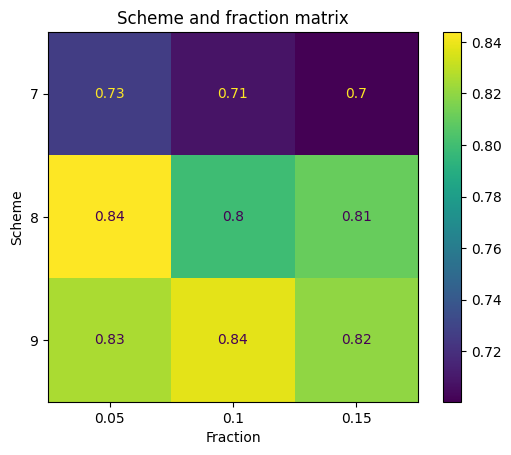

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix=accuracy_vs_scheme_vs_fraction)
disp.plot()
disp.ax_.set_title("Scheme and fraction matrix")
disp.ax_.set_xlabel('Fraction')
disp.ax_.set_ylabel('Scheme')
tick_marks = np.arange(len(fractions))
plt.xticks(tick_marks, fractions)
plt.yticks(tick_marks, schemes)




In [ ]:
X, y, X_train, X_test, y_train, y_test,  X_val, y_val = get_X_y(df)
y_train = to_categorical(y_train)
y_val = to_categorical(y_val)

In [ ]:
classes = print_classes(df)

In [ ]:
input_size = 1024
num_classes = len(classes)
batch_size = 512
epochs = 200

model_NN = Sequential([
    Dense(input_size, input_dim=input_size, activation='relu'),
    Dense(2*input_size, activation='relu'),
   # Dropout(0.1),
    #Dense(2*input_size, activation='relu'),
    #Dropout(0.2),
    #Dense(2*input_size, activation='relu'),
    # Dense(2*input_size, activation='relu'),
    # Dropout(0.2),
    # Dense(2*input_size, activation='relu'),
    # Dense(2*input_size, activation='relu'),
   #  Dropout(0.2),
     #Dense(2*input_size, activation='relu'),
     Dense(4*input_size, activation='relu'),
     Dropout(0.2),
    Dense(num_classes, activation='softmax')
  ])

model_NN.compile(loss='categorical_crossentropy', optimizer='Adam', metrics='accuracy')
#callback = keras.callbacks.EarlyStopping(monitor='val_loss', patience=15)
history = model_NN.fit(X_train, y_train, #callbacks=[callback],
          batch_size=batch_size, epochs=epochs, verbose=1,
          validation_data=(X_val, y_val))

In [ ]:
get_confusion_matrix(model_NN, X_test, y_test, 'neural_network', 'all', classes)

(400, 1024)
3/3 [==============================] - 0s 4ms/step
(400, 1024)
3/3 [==============================] - 0s 5ms/step


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

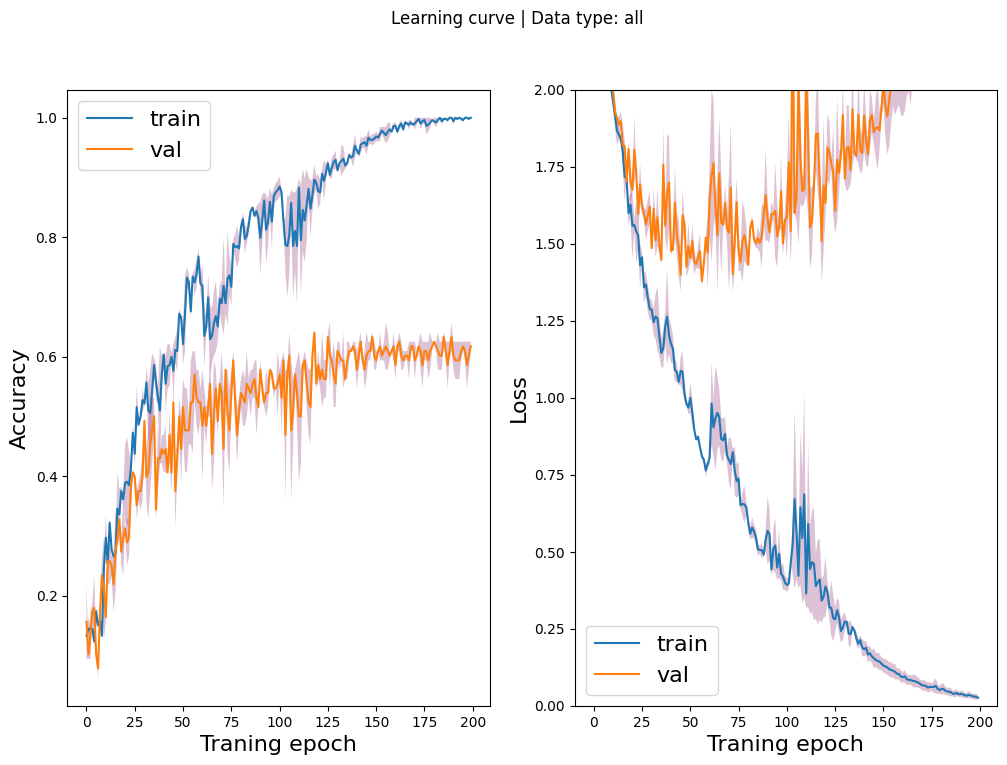

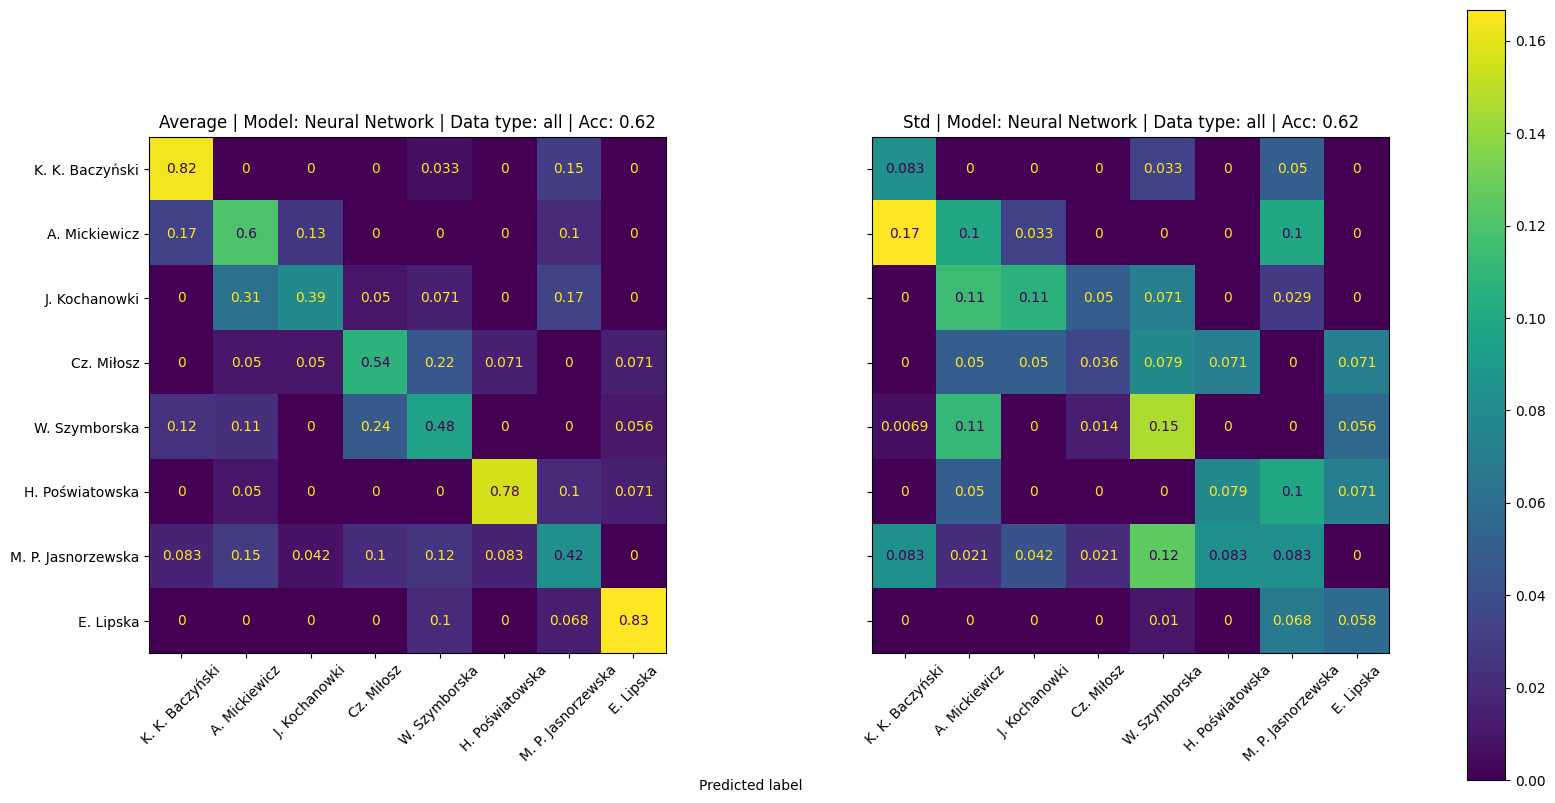

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

0.625

<Figure size 1000x500 with 0 Axes>

In [ ]:
make_experiment(df, 'all', '2')

In [ ]:
val_loss_mean = np.mean(val_loss_realizations, axis=1)
train_loss_mean = np.mean(train_loss_realizations, axis=1)
val_acc_mean = np.mean(val_acc_realizations, axis=1)
train_acc_mean = np.mean(train_acc_realizations, axis=1)

val_loss_std = np.std(val_loss_realizations, axis=1)
train_loss_std = np.std(train_loss_realizations, axis=1)
val_acc_std = np.std(val_acc_realizations, axis=1)
train_acc_std = np.std(train_acc_realizations, axis=1)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

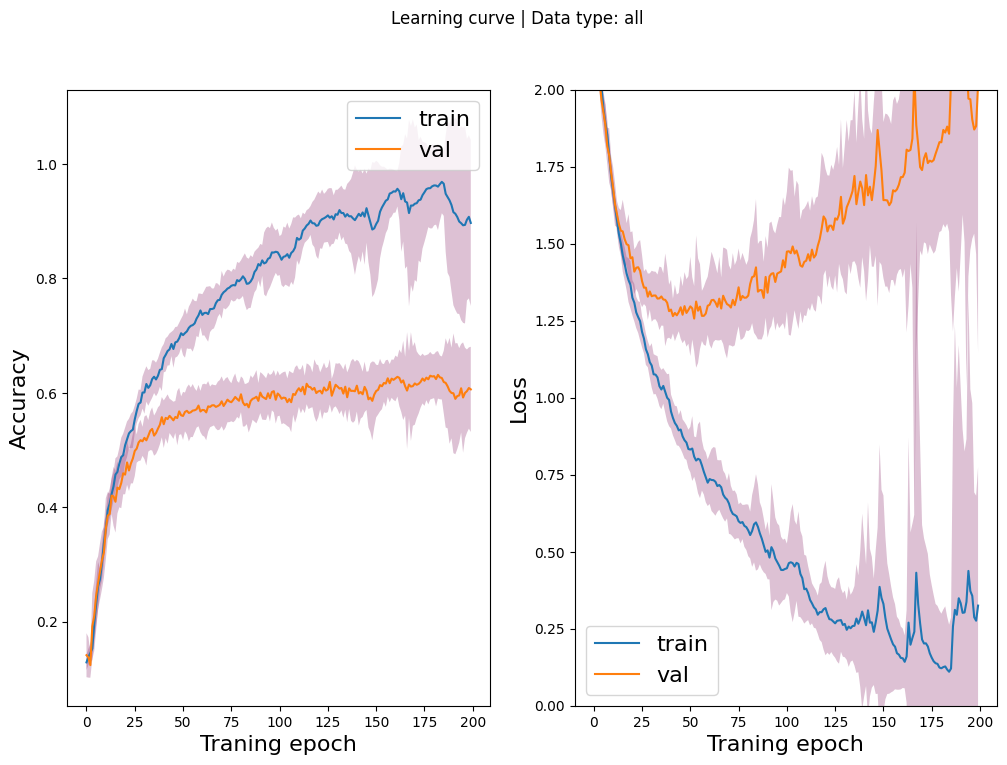

In [ ]:
fontsize = 16
data_type = "all"
epoch_vec = np.arange(0,epochs)
fig, ax = plt.subplots(1,2,figsize = (12, 8))
clrs = sns.color_palette("flare")
ax[1].set_ylim([0,2])
ax[1].plot(epoch_vec, train_loss_mean, label = "train")
ax[1].fill_between(epoch_vec, train_loss_mean - train_loss_std, train_loss_mean + train_loss_std, alpha = 0.3, facecolor=clrs[4] )
ax[1].plot(val_loss_mean,  label = "val")
ax[1].fill_between(epoch_vec, val_loss_mean - val_loss_std, val_loss_mean + val_loss_std, alpha = 0.3, facecolor=clrs[4] )

ax[0].plot(epoch_vec, train_acc_mean,  label = "train")
ax[0].fill_between(epoch_vec, train_acc_mean - train_acc_std, train_acc_mean + train_acc_std, alpha = 0.3, facecolor=clrs[4])
ax[0].plot(val_acc_mean,  label = "val")
ax[0].fill_between(epoch_vec, val_acc_mean - val_acc_std, val_acc_mean + val_acc_std, alpha = 0.3, facecolor=clrs[4] )


ax[1].set_xlabel("Traning epoch", fontsize=fontsize)
ax[1].set_ylabel("Loss", fontsize=fontsize)
ax[0].set_xlabel("Traning epoch", fontsize=fontsize)
ax[0].set_ylabel("Accuracy", fontsize=fontsize)

ax[1].legend( fontsize = fontsize)
ax[0].legend( fontsize = fontsize)
fig.suptitle('Learning curve | Data type: {}'.format(data_type))

fig.savefig('/content/figs/avgr_learning_curve_{}_remove_cut_3_remove.png'.format(data_type))
files.download('/content/figs/avgr_learning_curve_{}_remove_cut_3_remove.png'.format(data_type))

In [ ]:
CM_avrg = np.zeros((n_classes,n_classes))
CM_std = np.zeros((n_classes,n_classes))
score_avrg = np.mean(scores)

for i in range(0,n_classes):
  for j in range(0,n_classes):
    CM_avrg[i,j] = np.mean(CM[i,j,:])
    CM_std[i,j] = np.std(CM[i,j,:])

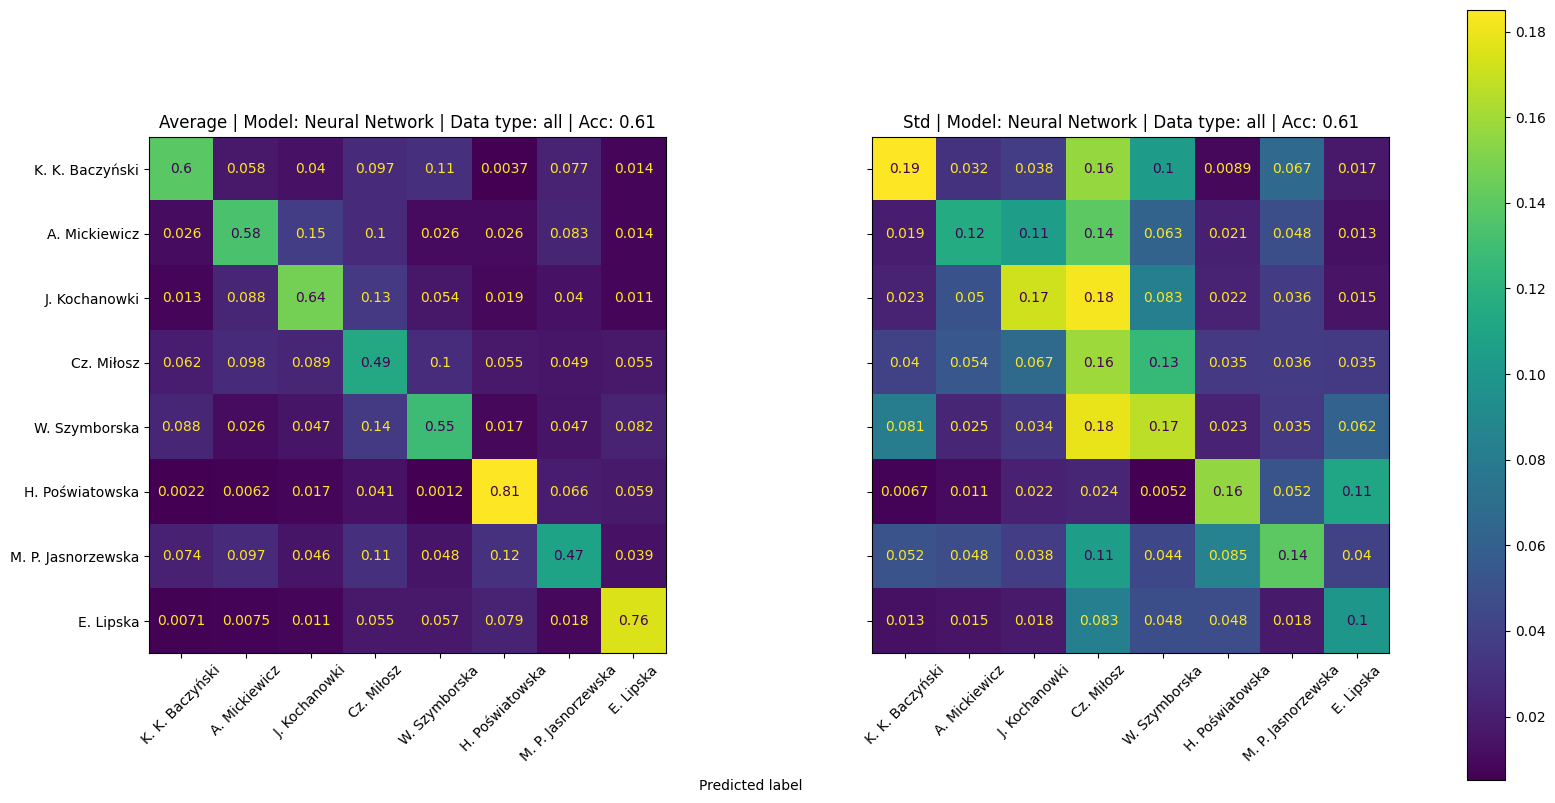

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 1000x500 with 0 Axes>

In [ ]:
classes = print_classes(df)
cls = []
for k in classes.keys():
  cls.append(k)

tick_marks = np.arange(4)
cms = {"Average": CM_avrg, "Std": CM_std}


fig, axes = plt.subplots(1, 2, figsize=(20,10), sharey='row')

for i, (key, cm) in enumerate(cms.items()):

  disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=cls)
  disp.plot(ax=axes[i], xticks_rotation=45)
  disp.ax_.set_title("{} | Model: Neural Network | Data type: {} | Acc: {}".format(key, data_type, round(score_avrg,2)))
  disp.im_.colorbar.remove()
  disp.ax_.set_xlabel('')
  disp.ax_.set_ylabel('')


fig.text(0.40, 0.1, 'Predicted label', ha='left')
plt.subplots_adjust(wspace=0.40, hspace=0.1)

fig.colorbar(disp.im_, ax=axes)
plt.show()

plt.gcf().set_size_inches(10, 5)
fig.savefig('/content/figs/avrg_neural_network_{}_remove_cut_3_remove.png'.format(data_type), dpi=200)
files.download('/content/figs/avrg_neural_network_{}_remove_cut_3_remove.png'.format(data_type))

3/3 [==============================] - 0s 5ms/step


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

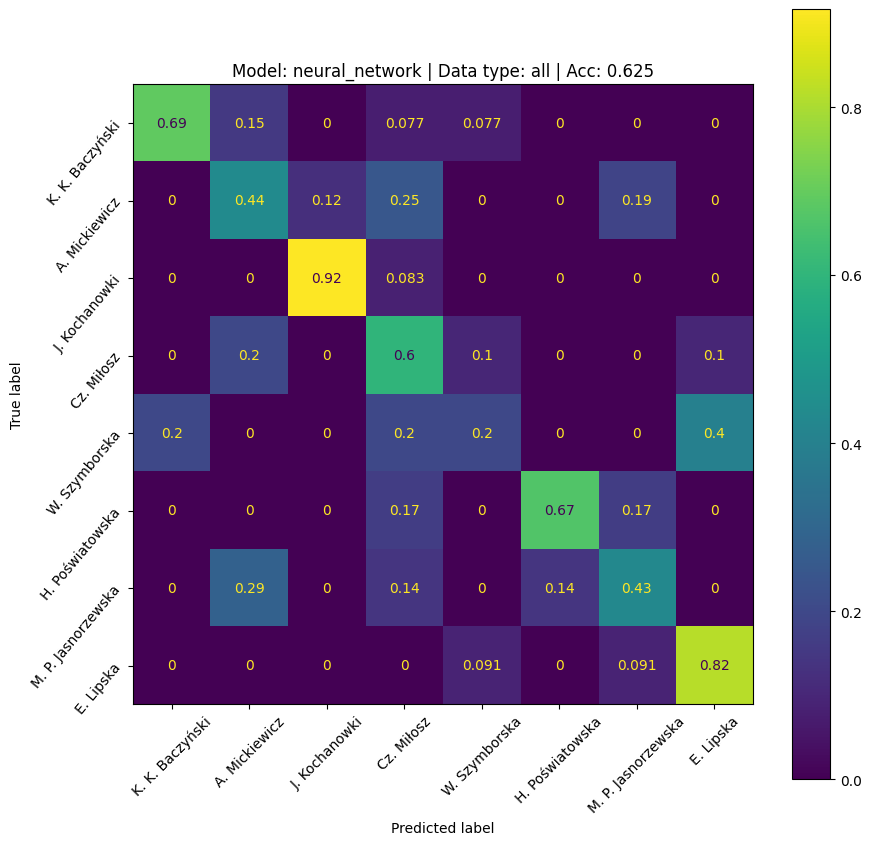

In [ ]:
scores, cm = get_confusion_matrix(model_NN, X_test, y_test, 'neural_network', 'all', classes)

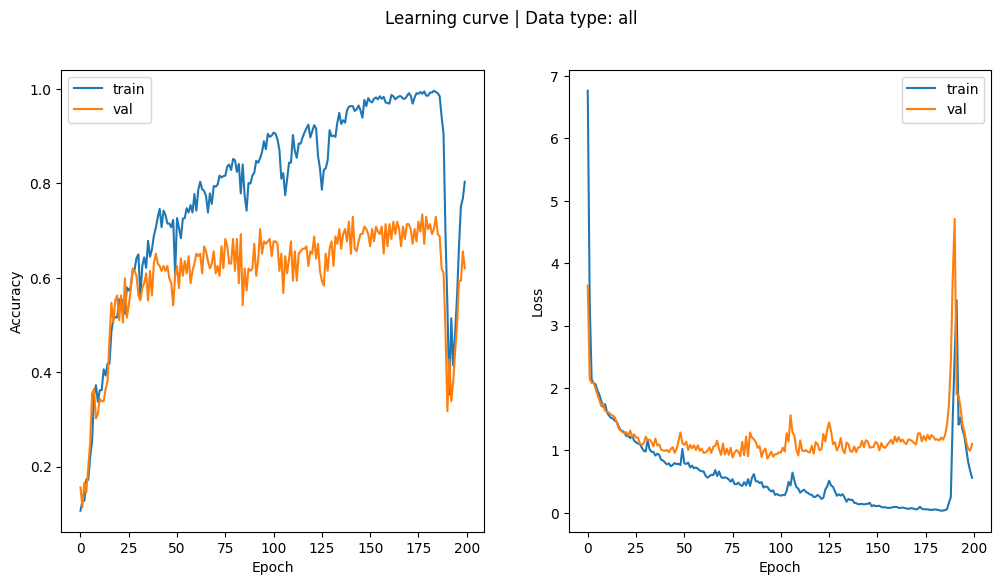

In [ ]:
draw_learning_curve(history, 'all')